<a href="https://colab.research.google.com/github/IbrahimEnouali/EC-DataScience-Coursework/blob/main/Machine-Learning/MeteoRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
#Import librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/IntroductionML/'
df = pd.read_csv(path + 'meteo.csv')

In [ ]:
df.shape

(1244, 47)

# Exploratory Data Analysis

In [ ]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Temperature.daily.mean..2.m.above.gnd.',
       'Relative.Humidity.daily.mean..2.m.above.gnd.',
       'Mean.Sea.Level.Pressure.daily.mean..MSL.',
       'Total.Precipitation.daily.sum..sfc.',
       'Snowfall.amount.raw.daily.sum..sfc.',
       'Total.Cloud.Cover.daily.mean..sfc.',
       'High.Cloud.Cover.daily.mean..high.cld.lay.',
       'Medium.Cloud.Cover.daily.mean..mid.cld.lay.',
       'Low.Cloud.Cover.daily.mean..low.cld.lay.',
       'Sunshine.Duration.daily.sum..sfc.',
       'Shortwave.Radiation.daily.sum..sfc.',
       'Wind.Speed.daily.mean..10.m.above.gnd.',
       'Wind.Direction.daily.mean..10.m.above.gnd.',
       'Wind.Speed.daily.mean..80.m.above.gnd.',
       'Wind.Direction.daily.mean..80.m.above.gnd.',
       'Wind.Speed.daily.mean..900.mb.', 'Wind.Direction.daily.mean..900.mb.',
       'Wind.Gust.daily.mean..sfc.', 'Temperature.daily.max..2.m.above.gnd.',
       'Temperature.daily.min..2.m.a

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    1244 non-null   int64  
 1   Year                                          1244 non-null   int64  
 2   Month                                         1244 non-null   int64  
 3   Day                                           1244 non-null   int64  
 4   Hour                                          1244 non-null   int64  
 5   Minute                                        1244 non-null   int64  
 6   Temperature.daily.mean..2.m.above.gnd.        1244 non-null   float64
 7   Relative.Humidity.daily.mean..2.m.above.gnd.  1244 non-null   float64
 8   Mean.Sea.Level.Pressure.daily.mean..MSL.      1244 non-null   float64
 9   Total.Precipitation.daily.sum..sfc.           1244 non-null   f

In [ ]:
#Check for missing values
df.isnull().sum()

Unnamed: 0                                      0
Year                                            0
Month                                           0
Day                                             0
Hour                                            0
Minute                                          0
Temperature.daily.mean..2.m.above.gnd.          0
Relative.Humidity.daily.mean..2.m.above.gnd.    0
Mean.Sea.Level.Pressure.daily.mean..MSL.        0
Total.Precipitation.daily.sum..sfc.             0
Snowfall.amount.raw.daily.sum..sfc.             0
Total.Cloud.Cover.daily.mean..sfc.              0
High.Cloud.Cover.daily.mean..high.cld.lay.      0
Medium.Cloud.Cover.daily.mean..mid.cld.lay.     0
Low.Cloud.Cover.daily.mean..low.cld.lay.        0
Sunshine.Duration.daily.sum..sfc.               0
Shortwave.Radiation.daily.sum..sfc.             0
Wind.Speed.daily.mean..10.m.above.gnd.          0
Wind.Direction.daily.mean..10.m.above.gnd.      0
Wind.Speed.daily.mean..80.m.above.gnd.          0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1244.0,1446.852090,855.316870,1.00,700.5000,1438.000,2183.5000,2941.00
Year,1244.0,2013.876206,2.380015,2010.00,2012.0000,2014.000,2016.0000,2018.00
Month,1244.0,6.492765,3.428025,1.00,4.0000,6.000,9.0000,12.00
Day,1244.0,15.725080,8.791679,1.00,8.0000,16.000,23.0000,31.00
Hour,1244.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
Minute,1244.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00
Temperature.daily.mean..2.m.above.gnd.,1244.0,12.226616,7.094412,-7.10,6.6950,12.575,17.6400,29.59
Relative.Humidity.daily.mean..2.m.above.gnd.,1244.0,71.450595,9.419637,41.12,65.1100,71.880,78.4200,95.25
Mean.Sea.Level.Pressure.daily.mean..MSL.,1244.0,1017.014510,7.962332,978.45,1012.6450,1016.965,1021.6475,1038.58
Total.Precipitation.daily.sum..sfc.,1244.0,2.213505,4.301138,0.00,0.0000,0.100,2.5000,40.30


In [ ]:
# We can drop Hour and Minute since they are always zero
# We can also drop Year since we want the ability to predict for future years that we didn't see
df = df.drop(['Hour', 'Minute', 'Year'], axis=1)

In [ ]:
df['Month'].value_counts()

6     113
5     112
8     111
10    111
1     107
7     103
12    103
3     102
2      97
11     96
4      96
9      93
Name: Month, dtype: int64

In [ ]:
df['pluie.demain'] = df['pluie.demain'].astype(float)

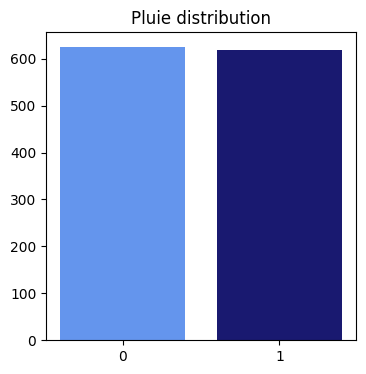

In [ ]:
val_count = df['pluie.demain'].value_counts()
plt.figure(figsize=(4,4))
plt.bar(['0', '1'], val_count.values, color = ['cornflowerblue', 'midnightblue'], align = 'center')
plt.title("Pluie distribution")
plt.show()

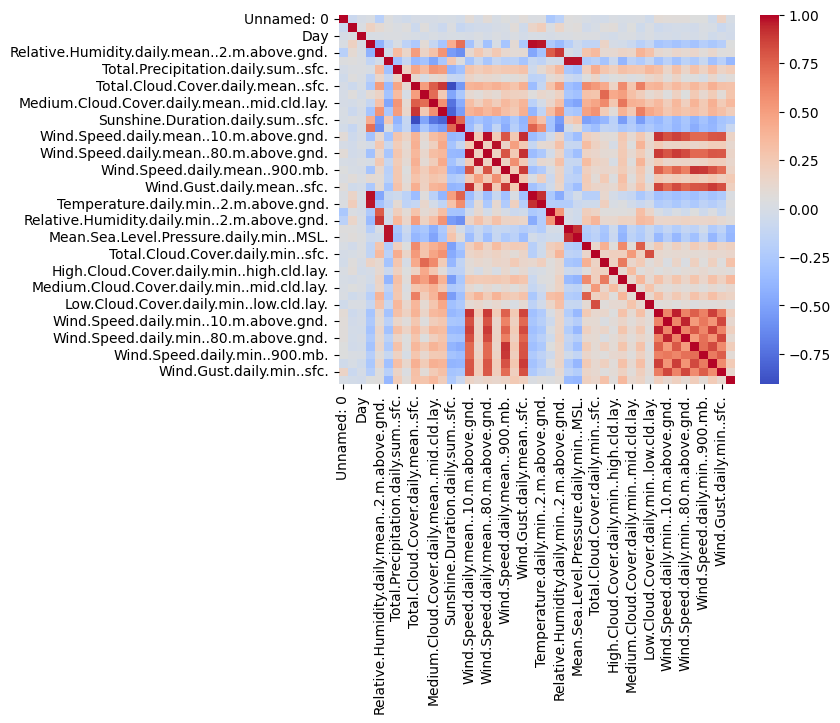

In [ ]:
# correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
len(df.columns[:-1])

43

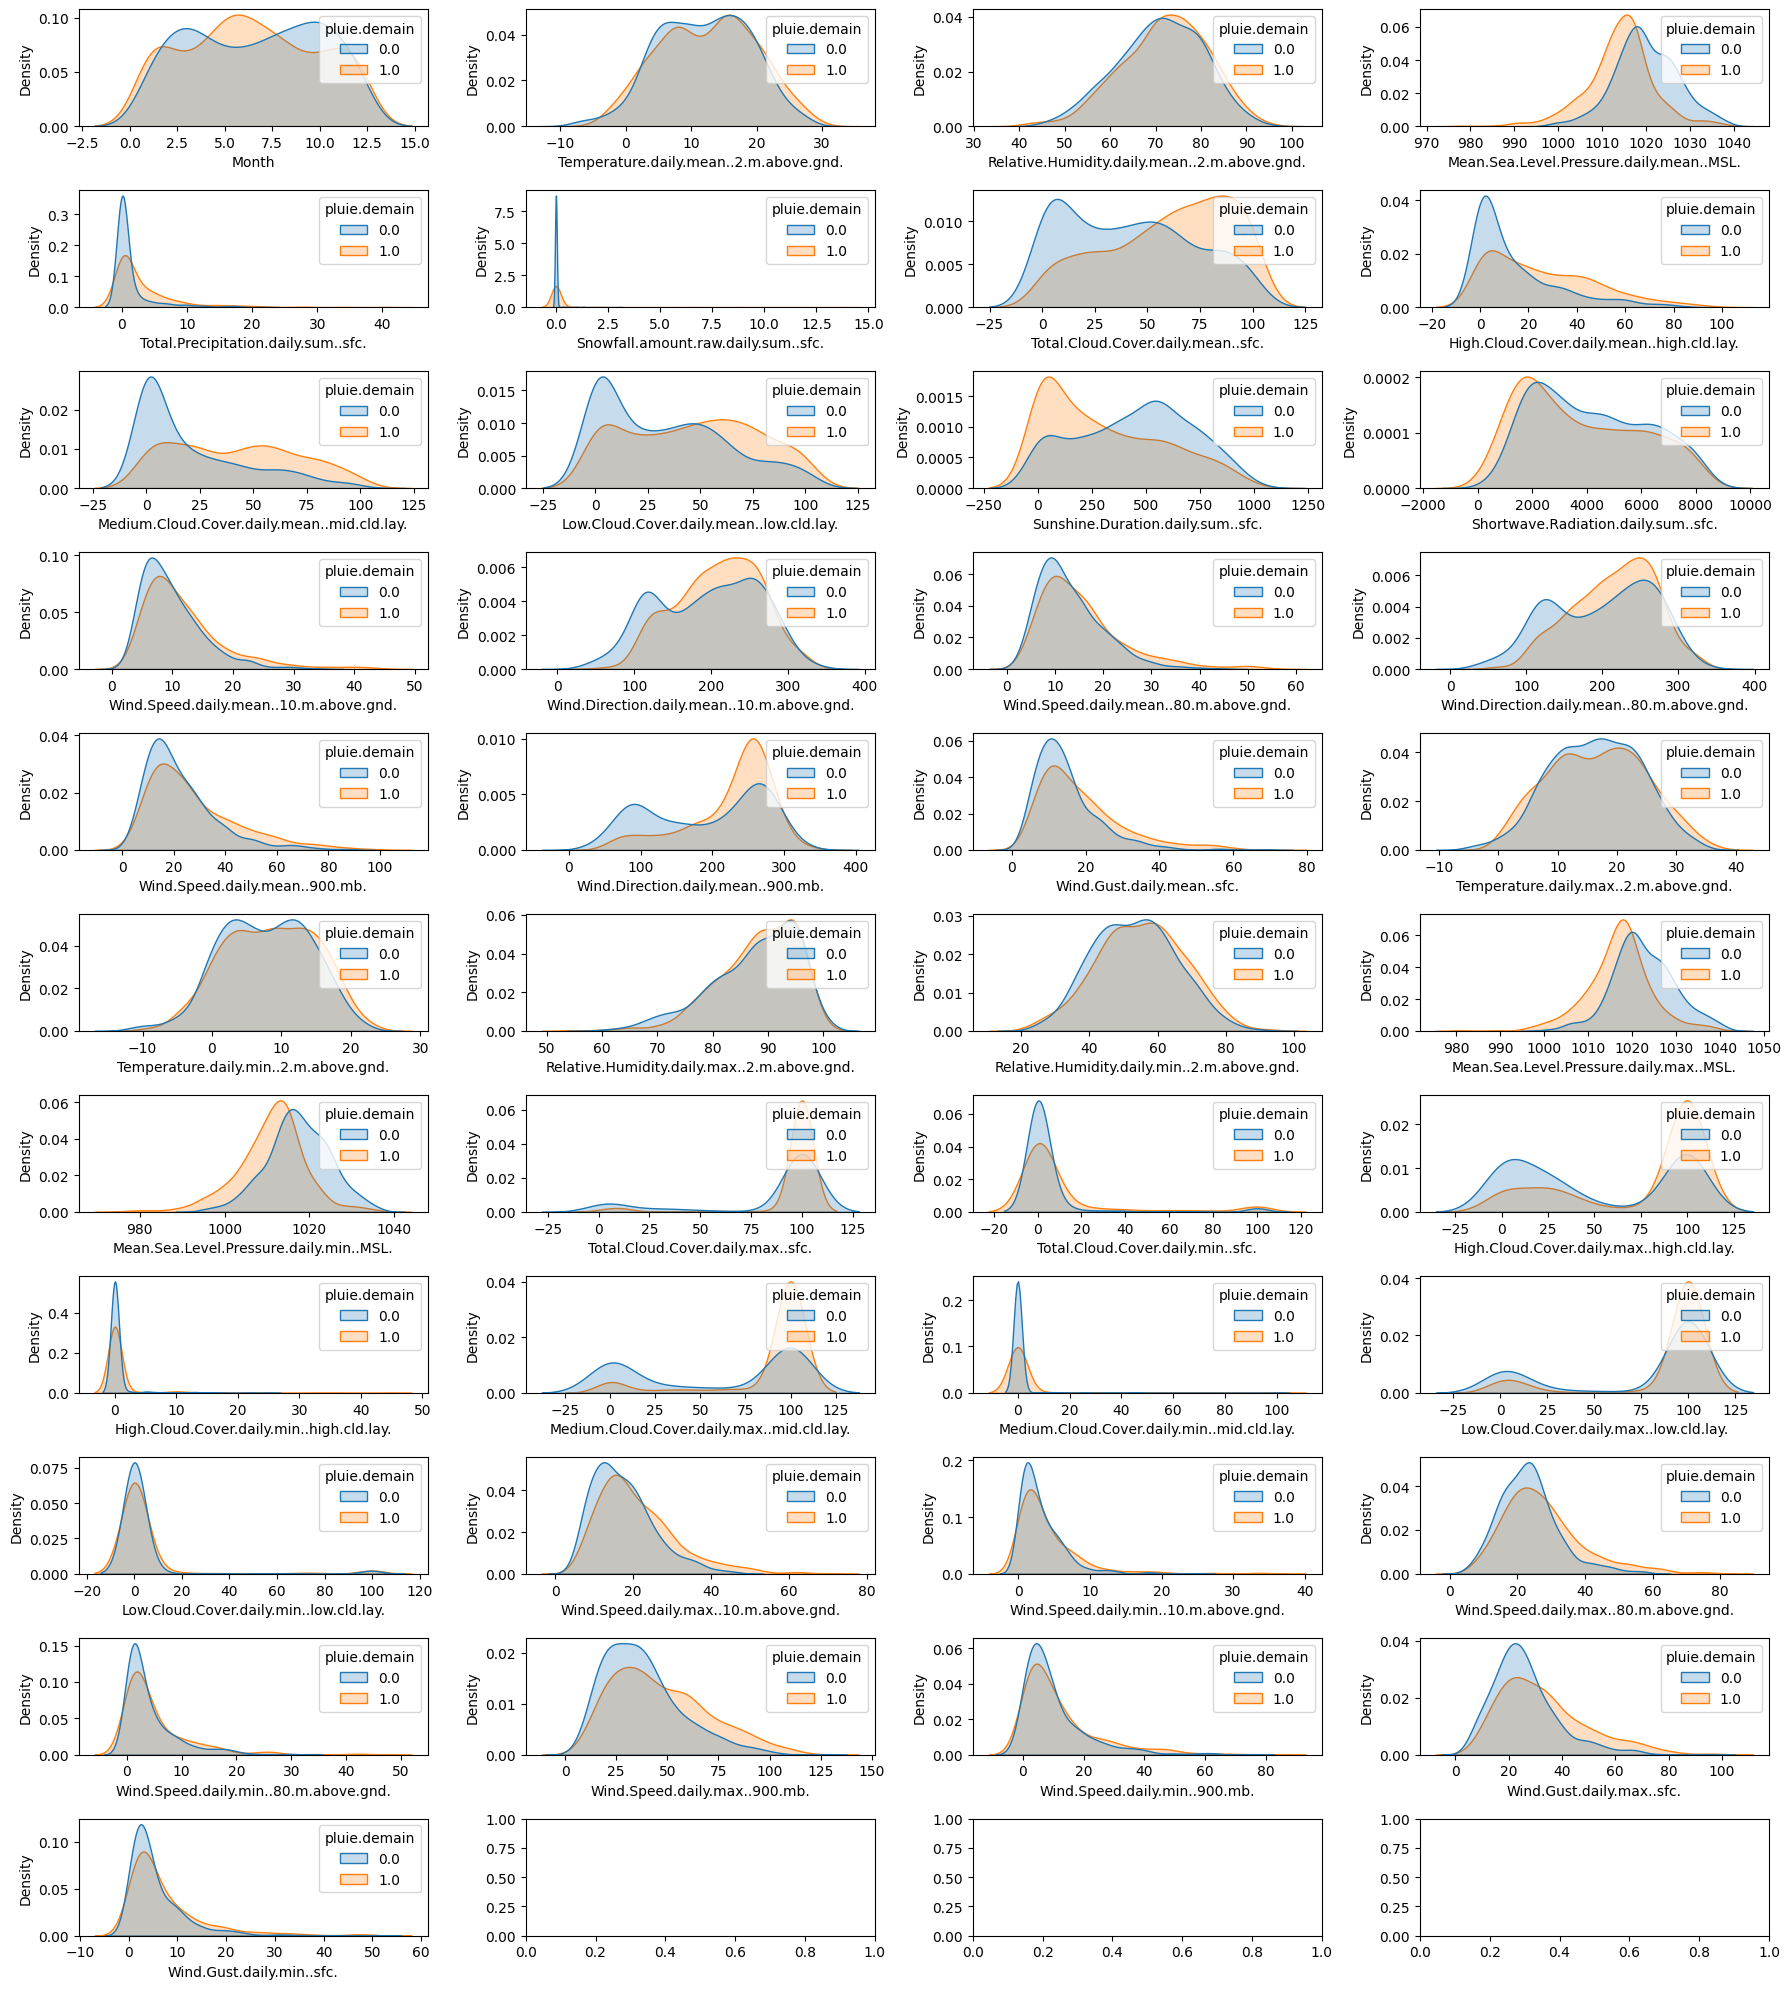

In [ ]:
features = df.columns[:-1]
target = df['pluie.demain']
fig, axs = plt.subplots(11, 4, figsize=(18, 20))  # Adjusted figsize for better visualization

for i, feature in enumerate(features):
    row = i // 4  # Calculate the row index for the subplot
    col = i % 4   # Calculate the column index for the subplot
    sns.kdeplot(data=df, x=feature, hue=target, fill=True, ax=axs[row, col], common_norm=False)

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

In [ ]:
# We can drop unamed:0 and Day since they don't have an added value to our target
df = df.drop(['Unnamed: 0', 'Day'], axis=1)

# Random Forest

In [ ]:
features = df.columns[:-1]
X = df[features]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.2, shuffle=True, random_state=4)

In [ ]:
clf = RandomForestClassifier(n_estimators=50,max_depth=10, random_state=5)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=5)

In [ ]:
y_hat_train = clf.predict(x_train)
y_hat_test = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_train = accuracy_score(y_train, y_hat_train)
accuracy_test = accuracy_score(y_test, y_hat_test)
print(f'Accuracy train: {accuracy_train:.4f}')
print(f'Accuracy test: {accuracy_test:.4f}')

Accuracy train: 0.9849
Accuracy test: 0.7269
